# Thresholding 
- Allows us to separate the foreground (i.e. the objects that we are interested in from the background of the image.

## Types of thresholding:
-  **Simple thresholding**: manually supply parameters to segment the image
- **Otsu's thrersholding**: more dynamic and automatically compute the optimal threshold value based on the input image.
- **Adaptive thresholding**: instead of trying to threshold an image globally using a single value, instead breaks the image down into smaller pieces, and thresholds each of these pieces separately and individually.

In [1]:
import cv2
import argparse
import sys 
sys.path.append("../")
from cv_imshow import display_image

In [2]:
args = {
    "image" : "../images/coins01.png"
}

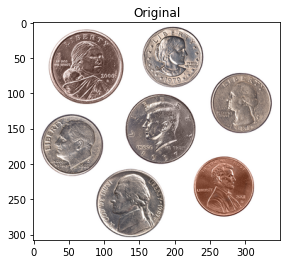

In [3]:
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7,7), 0) #to remove high freq noises and edges
display_image("Original", image)

### Simple Thresholding
- The first parameter is the image we want to threshold, the second value is our threshold check if a pixel value is greater than our threshold (in this case,200), we set it to be BLACK, otherwise it is WHITE.

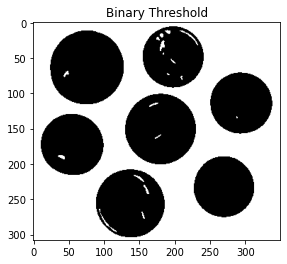

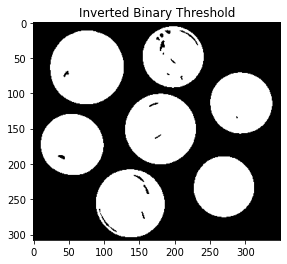

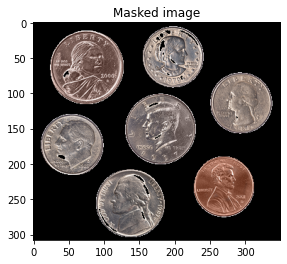

In [4]:
(T,thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
display_image("Binary Threshold", thresh)

(T,threshInv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
display_image("Inverted Binary Threshold", threshInv)

display_image("Masked image", cv2.bitwise_and(image, image, mask=threshInv))

### Otsu's method: 
- Assumes that our image contains two classes of pixels: the background and the foreground. Furthermore, Otsu’s method makes the assumption that the grayscale histogram of our pixel intensities of our image is bi-modal, which simply means that the histogram is two peaks.
- Example of global thresholding: implying that a single value of T is computed for the entire image.

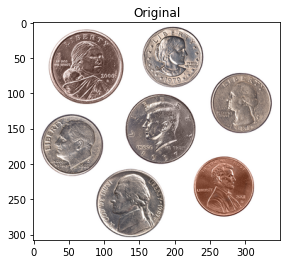

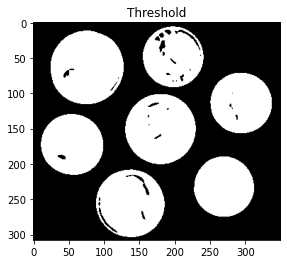

Otsu's threshold is 191.0


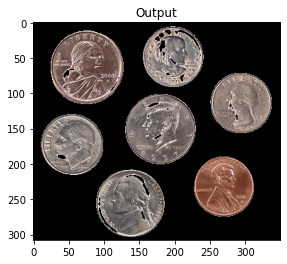

In [5]:
cv2.destroyAllWindows()
display_image("Original", image)

(T, threshInv)  = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
display_image("Threshold", threshInv)
print("Otsu's threshold is {}".format(T))

display_image("Output", cv2.bitwise_and(image, image, mask=threshInv))

### Adaptive thresholding: 
- Sometimes called local thresholding, our goal is to statistically examine the pixel intensity values in the neighborhood of a given pixel p.
- Assumption that underlies all adaptive and local thresholding methods is that smaller regions of an image are more likely to have approximately uniform illumination.
- Common practice to use either the arithmetic mean or the Gaussian mean of the pixel intensities in each
    region for computing T(threshold)
- We'll calculate the mean value of the neighborhood area of 25 pixels and threshold based on that value; finally, our constant C is subtracted from the mean calculation (in this case 15)

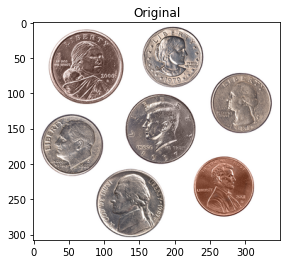

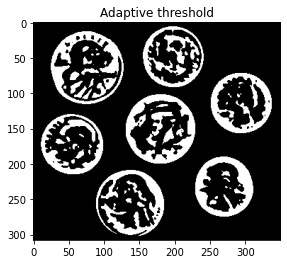

In [6]:
display_image("Original", image)

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)
display_image("Adaptive threshold", thresh)